# Applied Machine Learning: Assignment \#3

### Sheetal Parikh
EN.605.631.81<br>
February 15, 2021
***
***

## Problem 1
*Due to the severity of this real-world crisis, what information would be the most important one to "machine learn"? Can it be learned?*

In [1]:
# imports for notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import datasets, svm, metrics
import os 

#checking current directory
#print(os.getcwd() + "\n")

# change the current directory 
# to specified directory 
os.chdir(r"C:\Users\Sheetal\Documents\Sheetal") 

#Read in file
relative_path = 'datasets/master.csv'
df = pd.read_csv(relative_path)

# Sanity check
print(f'N rows={len(df)}, M columns={len(df.columns)}')

#print first few rows to visualize dataset
df.head()

N rows=27820, M columns=12


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


The most important information to "machine learn" would be determining what factors are indicators of having a high rate of suicide.  Suicide is amongst the top 10 causes of death worldwide and close to 800,000 people lose their life every year because of it.  Unfortunately, the COVID-19 pandemic has reportedly also started to cause an increase in suicides around the world.  For example, Japan was seeing a decrease in suicides at the beginning of the Pandemic (February to June 2020), however, they saw a rise in suicides at the second half of 2020.  Furthermore, in the US, Nevada's Clark County School District has already confirmed that there have been 19 suicides in the district since the school became fully remote since March 2020 compared to 9 suicides in 2019. Even though it is difficult to determine exactly why these rates have been rising, I believe it is possible for a model to learn what factors are more likely to cause a high rate of suicides. We can look further into why developed countries such as the US and Japan have relatively high rates of suicide.  Looking into what factors may impact suicide rates may provide vital information for policies, practices, or changes that countries could emphasize or implement in order to curb the increase in suicide rates.  
 

## Problem 2

*Explain in detail how one should set up the problem? Would it be a regression or a classification problem? Any unsupervised approach to see some patterns exist or not?*

In [2]:
# Print some info about datatypes of dataset
print(df.dtypes)

print("")
print(f'Column Names:')

#printing column names
print(df.columns)

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

Column Names:
Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


We can see that the dataset has 27,820 datapoints and 12 features that are both integers, floating points, and objects. It appears that the HDI(human development index) for year variable has many null values for various datapoints.  We want to look further whether any other variables have null values. This will be helpful when pre-processing the data in Problem 4.  We also see that gdp_for_year has an extra space.  The variable suicides/100k pop will be an important variable so the column can be renamed to make it easier to use.

In [3]:
#renaming suicides/100k pop column
df.rename(columns = {'suicides/100k pop':'suicides_per_100k'}, inplace = True) 


df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides_per_100k         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

We can see above, that only HDI has many null values. HDI represents the human development index which measures the development of a country through 3 dimensions: a long and healthy life(life expectancy), being knowledgeable(education), and standard of living (GNI per capita).  I think overall HDI might be a very useful indicator for predicting suicides. Otherwise, HDI would be a good variable to drop due to its abundance of null values.  We will have to impute the missing values when preprocessing the data.  We can plot some graphs below to visualize any patterns in the data.

In [4]:
#plotting suicides/100k pop per year to see whether suicides have increased or decreased from 1985-2020

#grouping data by year to be used in and to better visualize data
yearly_data = df.groupby('year').sum()
yearly_data 

,suicides_no,population,suicides_per_100k,HDI for year,gdp_per_capita ($)
year,,,,,
1985,116063,1008600086,6811.89,310.428,3508548
1986,120670,1029909613,6579.84,0.000,4104636
1987,126842,1095029726,7545.45,0.000,5645760
1988,121026,1054094424,7473.13,0.000,5870508
1989,160244,1225514347,8036.54,0.000,6068424
1990,193361,1466620100,9878.75,429.480,7531260
1991,198020,1489988384,10321.06,0.000,7782096
1992,211473,1569539447,10528.88,0.000,8195232
1993,221565,1530416654,10790.29,0.000,8231796


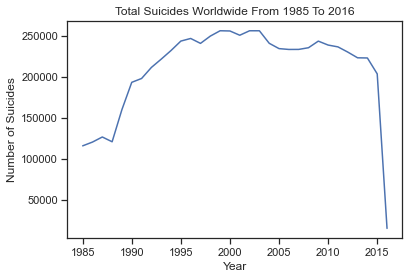

In [5]:
#plotting data per year

yearly_data['suicides_no'].plot()
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.title('Total Suicides Worldwide From 1985 To 2016')
plt.show()

The number of suicides worldwide increasaed from 1985 to about 2003.  Since then there has been a slight decrease in the number of suicides worldwide. Also, as can be seen by the graph and table above, there is a huge dip in the total number of suicides in 2016.  The table also shows for example that the total number of suicides in 2016 was only 15,603 vs 203,640 in 2015.  It is very possible that we have incomplete data for 2016 so it will be best to drop any datapoints from the year 2016 prior to determining any correlations in problem 4 so we aren't working with incomplete data.

Text(0.5, 1.0, 'Mean Number of Suicides/100K Populations Worldwide From 1985 To 2016')

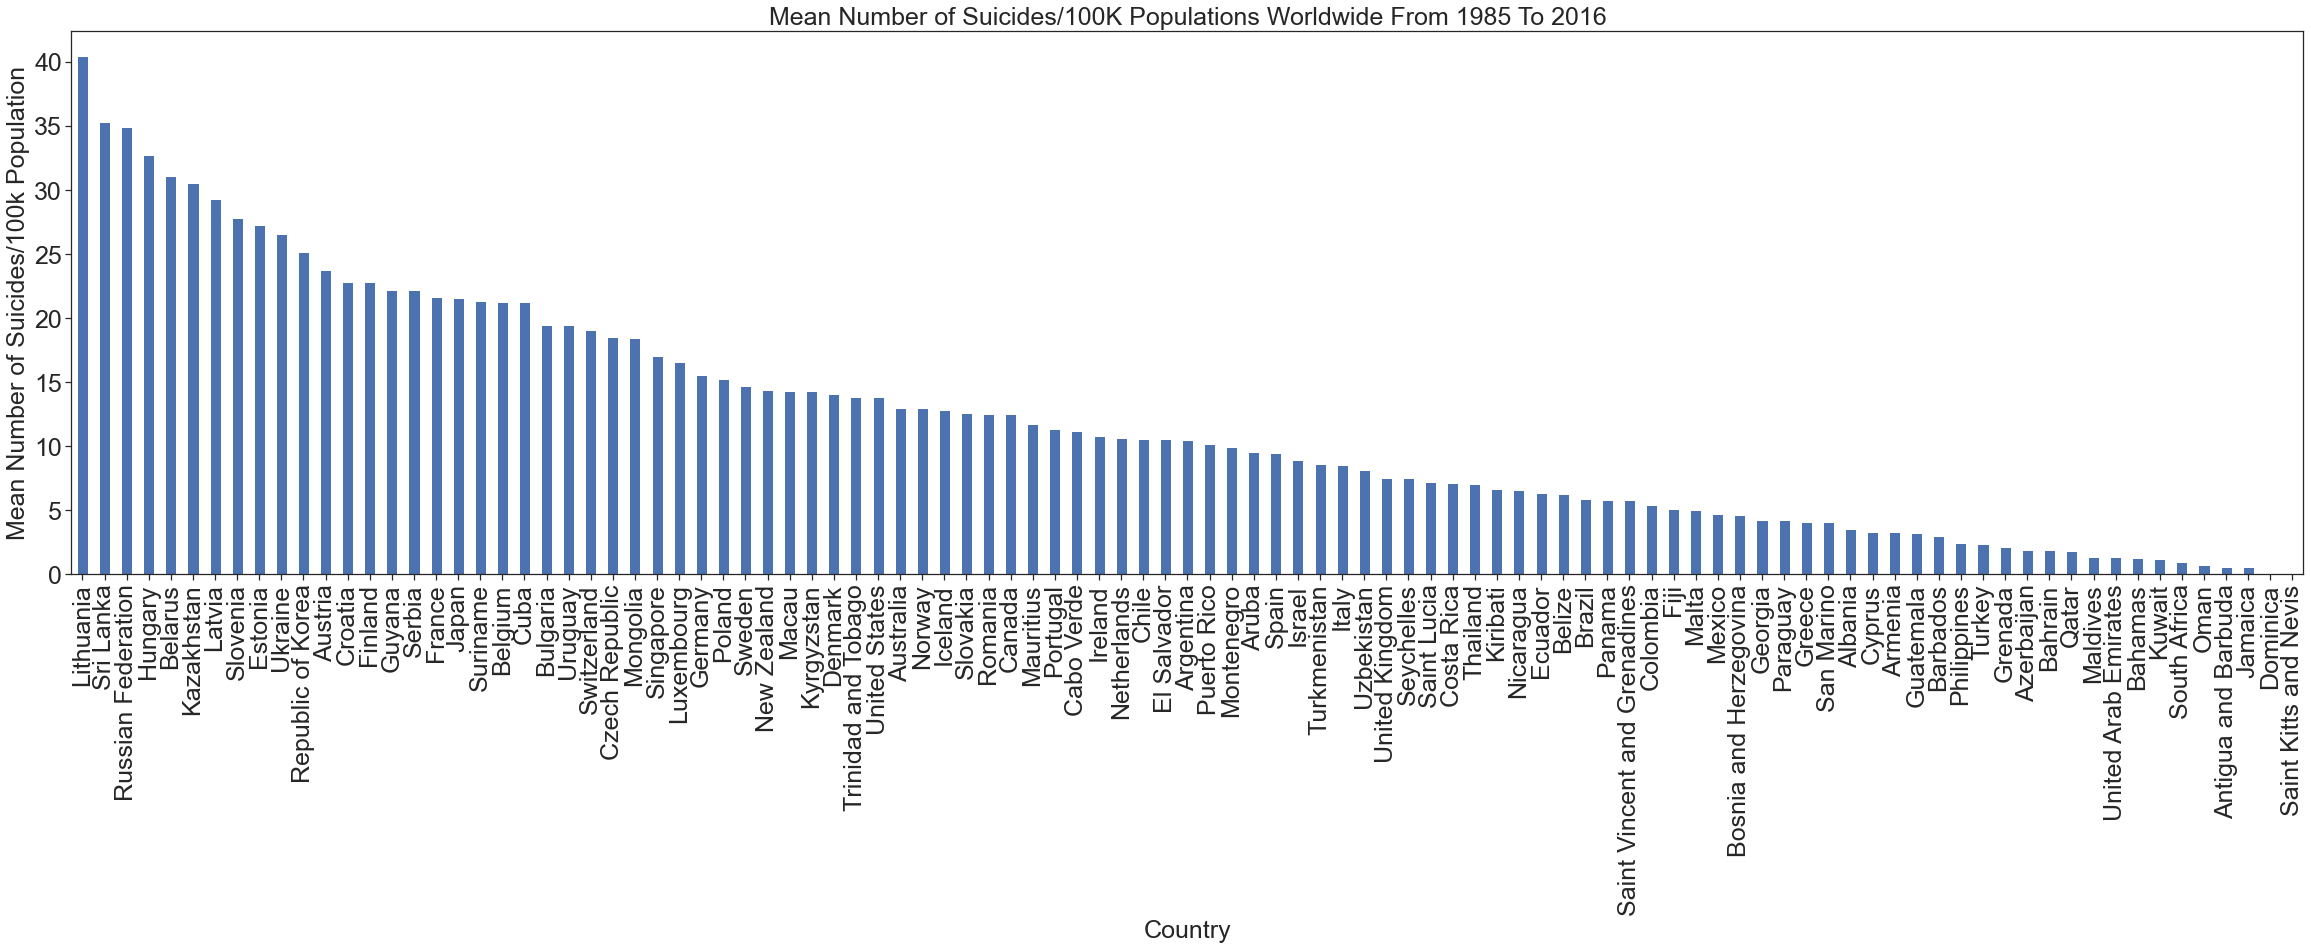

In [6]:
#plotting suicide rates per country

country_data = df.groupby('country')['suicides_per_100k'].mean().sort_values(ascending = False)
country_data.plot(kind='bar', figsize=(40,10), fontsize=25)
plt.xlabel('Country', fontsize = 25)
plt.ylabel('Mean Number of Suicides/100k Population', fontsize = 25)
plt.title('Mean Number of Suicides/100K Populations Worldwide From 1985 To 2016', fontsize = 25)

Above we can see a plot of the mean number of suicides per 100k of the population per country from 1985 to 2016.  Lithuania appears to have the highest rate of suicides.  Suprisingly well developed countries such as France, Japan and the United States fall in the top 40 of countries with the highest rates of suicide. 

<function matplotlib.pyplot.show(*args, **kw)>

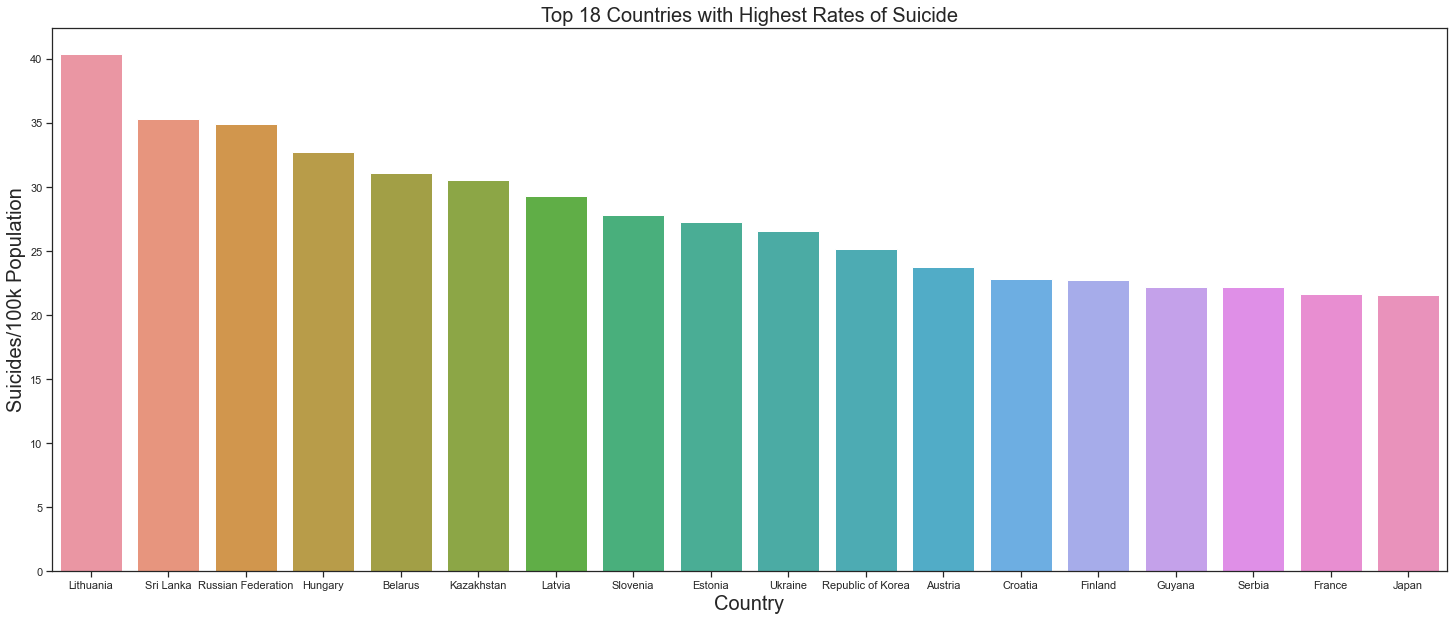

In [7]:
#plotting highest rates of sucides
fig,ax = plt.subplots(1,1,figsize=(25,10))
ax = sns.barplot(country_data.head(18).index,country_data.head(18))
plt.ylabel('Suicides/100k Population', fontsize = 20)
plt.xlabel('Country', fontsize = 20)
plt.title('Top 18 Countries with Highest Rates of Suicide', fontsize = 20)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

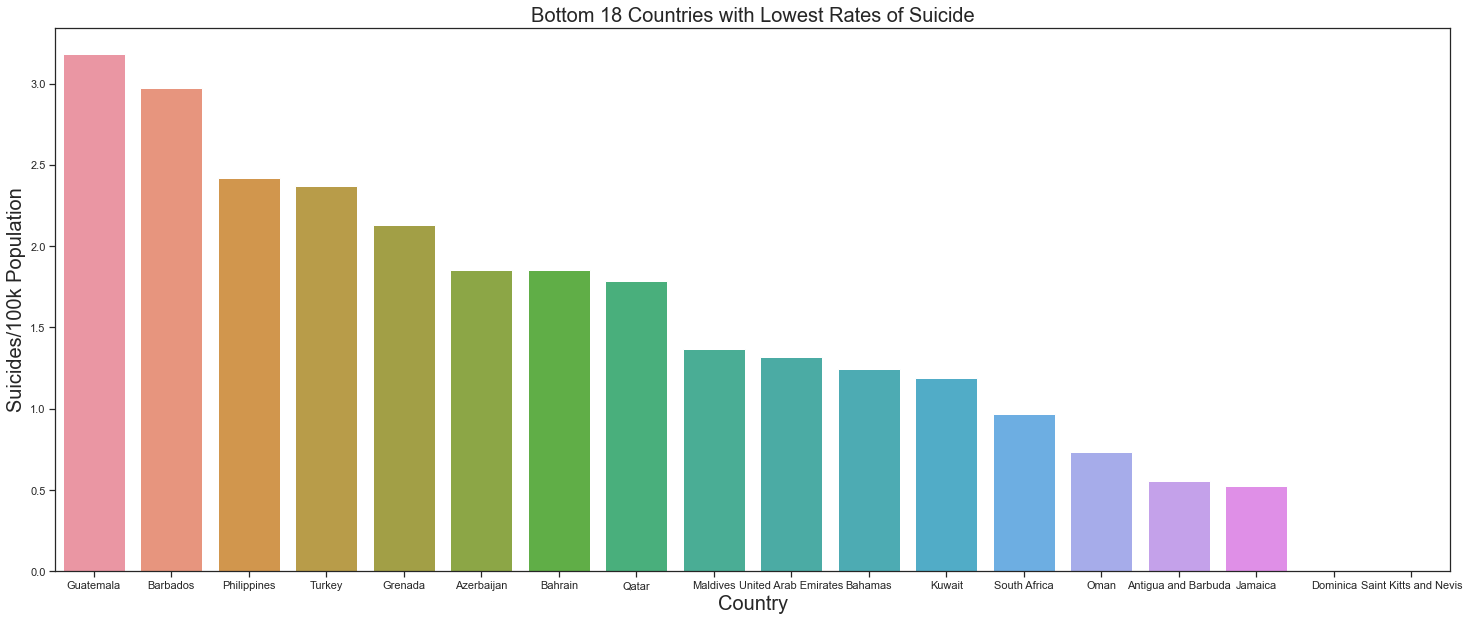

In [8]:
#plotting lowest rates of suicide
fig,ax = plt.subplots(1,1,figsize=(25,10))
ax = sns.barplot(country_data.tail(18).index,country_data.tail(18))
plt.ylabel('Suicides/100k Population', fontsize = 20)
plt.xlabel('Country', fontsize = 20)
plt.title('Bottom 18 Countries with Lowest Rates of Suicide', fontsize = 20)
plt.show

The two bar plots above shows a closer look of the top 18 countries with the highest rates of suicide and the bottom 18 countries with the lowest rates of suicide. I noticed that the plot with the bottom 18 countries includes countries that are usually vacation spots that are surrounded by water such as Barbados, Maldives, Bahamas, and Jamaica.

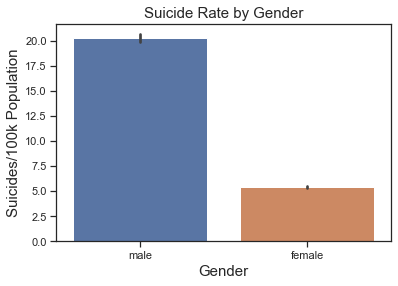

In [9]:
#plotting suicide rates per gender

sns.barplot(x="sex", y="suicides_per_100k", data=df)
plt.ylabel('Suicides/100k Population', fontsize = 15)
plt.xlabel('Gender', fontsize = 15)
plt.title('Suicide Rate by Gender', fontsize = 15)
plt.show()


We can see above that males commit overwhelmingly more suicides than women.

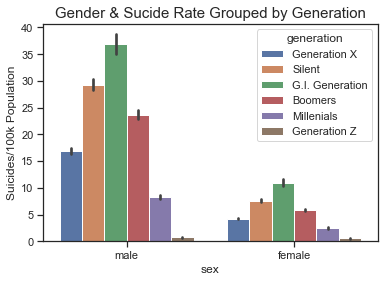

In [10]:
#plotting suicide rates by gender grouped by generation

sns.barplot(x="sex", y="suicides_per_100k", hue="generation", data=df)
plt.ylabel('Suicides/100k Population')
plt.title('Gender & Sucide Rate Grouped by Generation', fontsize = 15)
plt.show()

Overall, we can see above that the G.I. Generation meaning the World War II Generation commit the most suicides.  Generation Zm those born in the mid to late 90's to early 2010's commits the least suicides.   

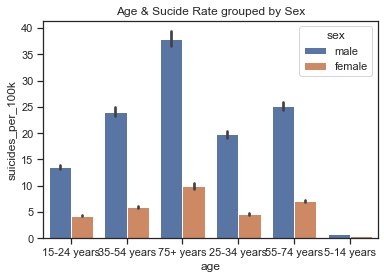

In [11]:
#plotting suicide rates per generation

sns.barplot(x="age", y="suicides_per_100k", hue="sex", data=df)
plt.title('Age & Sucide Rate grouped by Sex')
plt.show()

Based on the Gender & Suicide Rate Grouped by Generation graph, it makes sense that the graph directly above shows that those above 75 commit the most suicides.  

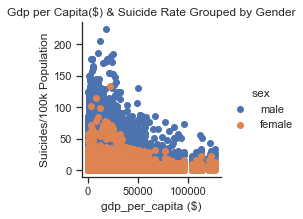

In [12]:
# plotting gdp per capita vs suicide rate grouped by gender

p = sns.FacetGrid(df, hue = 'sex')
p.map(plt.scatter, 'gdp_per_capita ($)', 'suicides_per_100k')
plt.ylabel('Suicides/100k Population')
plt.title('Gdp per Capita($) & Suicide Rate Grouped by Gender')
p.add_legend();

It appears that having a lower GDP per capita appears to indicate a higher rate of suicide.

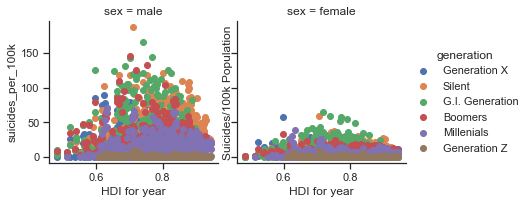

In [13]:
# plotting HDI for year vs suicide rate grouped by gender and generation

p2 = sns.FacetGrid(df, col = 'sex', hue = 'generation')
p2.map(plt.scatter, 'HDI for year', 'suicides_per_100k')
plt.ylabel('Suicides/100k Population')
p2.add_legend();

Supprisingly having a middle to higher HDI seems to indicate a higher risk of suicide. Initially I thought that a higher HDI would mean the opposite.  Regardless of the GDP, HDI, generation, or age range, men alway seem to have a rate of suicide.

Both a supervised classification or regression model could be built to predict the suicides/100k population variable since we know the suicide rates per country.  If building a classification problem, we can perform a binary classification.  In the preprocessing step, we will have to determine a threshold for what is considered a high or low rate of suicide. After determining this threshold, we can assign values of 0 to countries with a low risk and 1 to countries with a high risk of suicide. We can also build a regression model since the dependent variable, suicides/100k pop, is a continuous output variable.  

## Problem 3

*What should be the dependent variable?*

After exploring the data as shown in problem 2, I believe the Suicide Rates/100k population should be the dependent variable.  The Suicide Rate/100k is a variable that can be compared between the different countries of various sizes. A similar variable, such as the number of suicides, would not be a good dependent variable because the overall number of suicides may just be higher in a country with a higher population.  For example, 100,000 suicides in a heavily populated country means something different to 100,000 suicides in a country with a small population. 

## Problem 4

*Rank the variables to find some strong correlations between the independent variables and the dependent variable you decided.*

In [14]:
#dropping 2016 data because very few data points - data possibly incomplete for 2016
df = df[df.year != 2016]

print(df.shape)

(27660, 12)


We started out with 27,820 data points and were able to elminate 160 data points due to incomplete data.  We can now use the pearson method in pandas to calculate the correlation between variables as well as visualize correlation plots.

In [15]:
df.corr(method = 'pearson')

,year,suicides_no,population,suicides_per_100k,HDI for year,gdp_per_capita ($)
year,1.000000,-0.002953,0.011583,-0.039800,0.366786,0.338854
suicides_no,-0.002953,1.000000,0.616105,0.307103,0.151399,0.062168
population,0.011583,0.616105,1.000000,0.008461,0.102943,0.083006
suicides_per_100k,-0.039800,0.307103,0.008461,1.000000,0.074279,0.002015
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.338854,0.062168,0.083006,0.002015,0.771228,1.000000


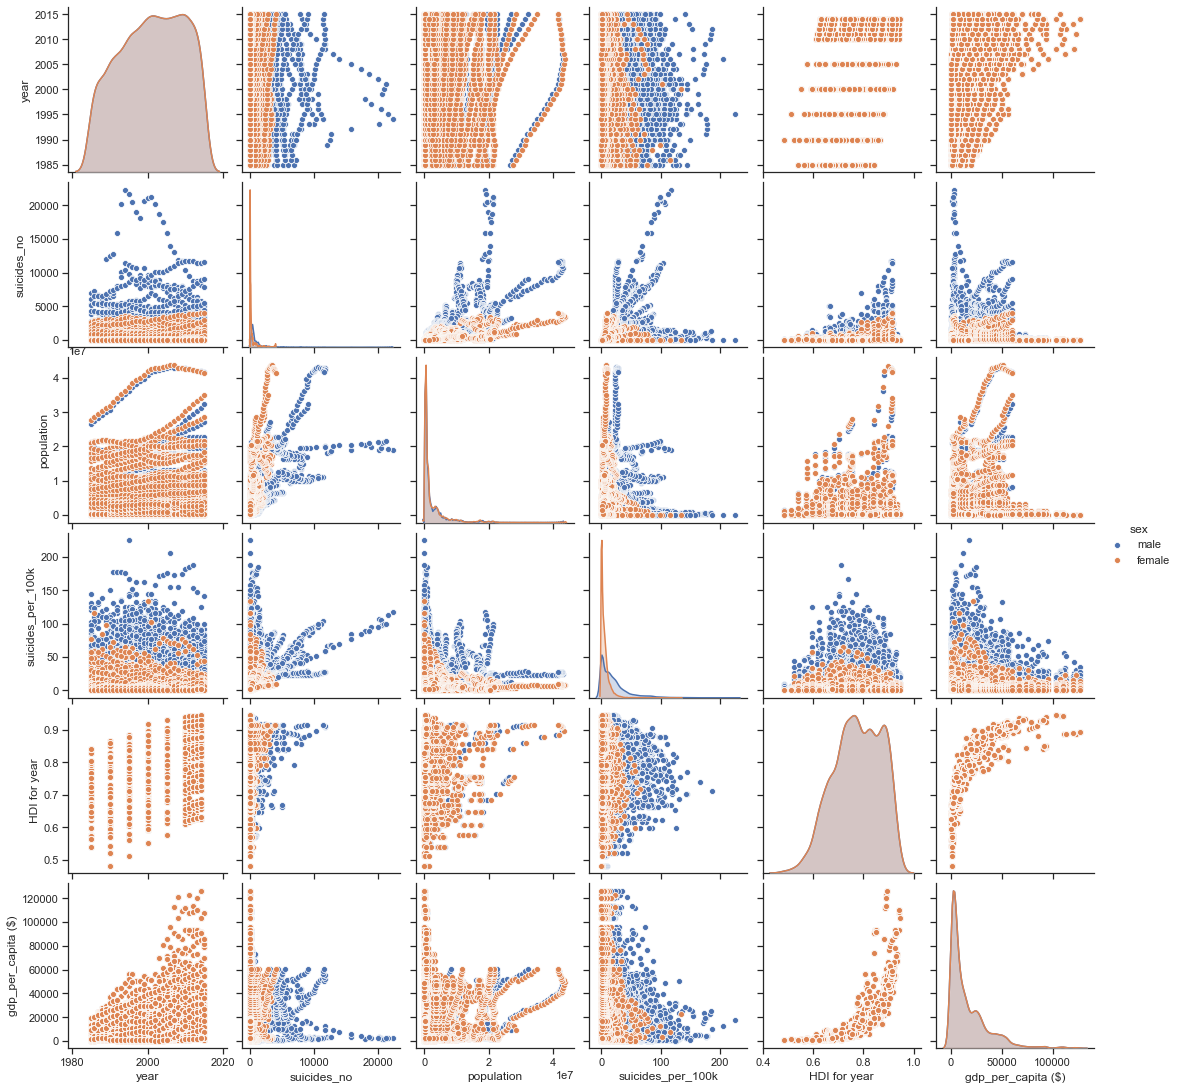

In [16]:
sns.pairplot(df, hue="sex")
plt.show()

After visualizing the data and calulating the pearson correlation between various variables, HDI appears to have the strongest correlation to the suicides/100k pop.  No other variable seems to have a strong correlation with the target value, however, other variables have a strong correlation with eachother.  The number of suicides has a strong correlation with the population.  Also, GDP per capita has a strong correlation with HDI.  If ranking the variables based on their correlation with the target variable (highest to lowest) we get the following: HDI for year, population, gpd per capita, and year. Using the pearson correlation in pandas and pairplot in seaborne, we were only able to determine the correlation between the suicides/100k pop and the numerical variables.  Variables such as country, sex, age and generation may be very important. 

## Problem 5

*Pre-process the dataset and list the major features you want to use. Note that not all features are crucial. For example, country-year variable is a derived feature and for a classifier it would not be necessary to include the year, the country and the country-year together. In fact, one must avoid adding a derived feature and the original at the same time.
List the independent features you want to use.*


As found above HDI has a strong correlation with the target variable, suicides/100k pop.  Therefore, we want to keep this variable. However, since GDP per capita had a strong correlation to HDI, we can remove this variable.  Population and the number of suicides were correlated. We can remove both variables since they seem redundant based on our target variable.  Also, GDP per year is similar to GDP per capita, so GDP per year can be removed as well. Furthermore, our data includes the year, country, and country-year.  Keeping all three is redundant so we will remove country-year and keep year and country. These changes leave us with the following variables: country, year, sex, age, HDI for year, and generation.

Dropping the features we won't be using

In [17]:
#dropping features

df2 = df.copy()
df2.drop(columns='suicides_no', inplace=True)
df2.drop(columns='population', inplace=True)
df2.drop(columns=' gdp_for_year ($) ', inplace=True)
df2.drop(columns='gdp_per_capita ($)', inplace=True)
df2.drop(columns='country-year', inplace=True)

#printing updated data set
df2.head()

,country,year,sex,age,suicides_per_100k,HDI for year,generation
0,Albania,1987,male,15-24 years,6.71,NaN,Generation X
1,Albania,1987,male,35-54 years,5.19,NaN,Silent
2,Albania,1987,female,15-24 years,4.83,NaN,Generation X
3,Albania,1987,male,75+ years,4.59,NaN,G.I. Generation
4,Albania,1987,male,25-34 years,3.28,NaN,Boomers


Checking for unique values using code from the Module 3 lecture notebook

In [18]:
# Check unique levels and see any marker is used for a missing level
for col in df2.columns:
    if df2[col].dtype == np.object:
        print(col, df2[col].unique())

country ['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway' 'Oman'
 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal' 'Puerto Rico'
 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South Afr

Checking for duplicates using code from the Module 3 notebook

In [19]:
# Check for duplicates, this adds a new column to the dataset
df2["is_duplicate"]= df2.duplicated()

# Note that when using f-strings, the internal quote character must be different, such as 'is_duplicate' above
print(f"#total= {len(df2)}")
print(f"#duplicated= {len(df2[df2['is_duplicate']==True])}")

#seeing how column was added
df2.head()

#total= 27660
#duplicated= 0


,country,year,sex,age,suicides_per_100k,HDI for year,generation,is_duplicate
0,Albania,1987,male,15-24 years,6.71,NaN,Generation X,False
1,Albania,1987,male,35-54 years,5.19,NaN,Silent,False
2,Albania,1987,female,15-24 years,4.83,NaN,Generation X,False
3,Albania,1987,male,75+ years,4.59,NaN,G.I. Generation,False
4,Albania,1987,male,25-34 years,3.28,NaN,Boomers,False


We do not have any duplicates in our dataset so we do not need to remove any rows and can remove the duplicate marker column that was added..

In [20]:
# Removing the duplicate marker column
df2.drop(columns='is_duplicate', inplace=True)
print(f'#total= {len(df2)}')

#seeing whether column was removed
df2.head()

#total= 27660


,country,year,sex,age,suicides_per_100k,HDI for year,generation
0,Albania,1987,male,15-24 years,6.71,NaN,Generation X
1,Albania,1987,male,35-54 years,5.19,NaN,Silent
2,Albania,1987,female,15-24 years,4.83,NaN,Generation X
3,Albania,1987,male,75+ years,4.59,NaN,G.I. Generation
4,Albania,1987,male,25-34 years,3.28,NaN,Boomers


We need to take care of the null values under the HDI for year column.  We can replace the null values within a country with that country's average HDI.

In [21]:
#replacing NaN for those countries where we have HDI listed for certain years
s = df2.groupby('country')['HDI for year'].transform('mean')
df2['HDI for year'].fillna(s, inplace=True)

#checking if we eliminated the NaNs
#df2.isnull().sum()

#any additional changes to the dataframe were being overwritten copied into another 
df3 = df2.copy()

df3.head()

,country,year,sex,age,suicides_per_100k,HDI for year,generation
0,Albania,1987,male,15-24 years,6.71,0.673,Generation X
1,Albania,1987,male,35-54 years,5.19,0.673,Silent
2,Albania,1987,female,15-24 years,4.83,0.673,Generation X
3,Albania,1987,male,75+ years,4.59,0.673,G.I. Generation
4,Albania,1987,male,25-34 years,3.28,0.673,Boomers


We still have some NaNs probably because some countries do not have an HDI listed at all.  For these countries we can replace the NaNs with the mean HDI for all countries 

In [22]:
print(f"mean-HDI for year = {np.mean(df3['HDI for year'])}")

#imputing
df3['HDI for year'] = df3['HDI for year'].fillna(df3['HDI for year'].mean())

#checking if we eliminated the NaNs
df3.isnull().sum()

mean-HDI for year = 0.7741414286078325


country              0
year                 0
sex                  0
age                  0
suicides_per_100k    0
HDI for year         0
generation           0
dtype: int64

In [23]:
#checking that the previous calculation of HDI wasn't overwritten
df3.head()

,country,year,sex,age,suicides_per_100k,HDI for year,generation
0,Albania,1987,male,15-24 years,6.71,0.673,Generation X
1,Albania,1987,male,35-54 years,5.19,0.673,Silent
2,Albania,1987,female,15-24 years,4.83,0.673,Generation X
3,Albania,1987,male,75+ years,4.59,0.673,G.I. Generation
4,Albania,1987,male,25-34 years,3.28,0.673,Boomers


We can now do one-hot encoding for the other nominal variables

In [24]:
#one hot coding formula from module 3 notebook
# pandas get_dummies function is one-hot-encoder
def encode_onehot(_df, f):
    _df2 = pd.get_dummies(_df[f], prefix='', prefix_sep='').max(level=0, axis=1).add_prefix(f+' - ')
    df4 = pd.concat([_df, _df2], axis=1)
    df4 = df4.drop([f], axis=1)
    return df4

# Print nominal variables
for f in list(df3.columns.values):
    if df3[f].dtype == np.object:
        print(f) 

country
sex
age
generation


In [25]:
# Appling the onehot-encoding method - the columns were not accumulating so had to create separate variables each time 
df_o = encode_onehot(df3, 'sex')
df1_o = encode_onehot(df_o, 'age')
df2_o = encode_onehot(df1_o, 'generation')
#df3_o = encode_onehot(df2_o, 'country')


#applying lable encoding for countries in order to limit the number of columns that are added
labelencoder = LabelEncoder()

df2_o.country = labelencoder.fit_transform(df2_o.country)  
df2_o.country.unique()

#printing resulting data for checking
df2_o.head()

,country,year,suicides_per_100k,HDI for year,sex - female,sex - male,age - 15-24 years,age - 25-34 years,age - 35-54 years,age - 5-14 years,age - 55-74 years,age - 75+ years,generation - Boomers,generation - G.I. Generation,generation - Generation X,generation - Generation Z,generation - Millenials,generation - Silent
0,0,1987,6.71,0.673,0,1,1,0,0,0,0,0,0,0,1,0,0,0
1,0,1987,5.19,0.673,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,0,1987,4.83,0.673,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0,1987,4.59,0.673,0,1,0,0,0,0,0,1,0,1,0,0,0,0
4,0,1987,3.28,0.673,0,1,0,1,0,0,0,0,1,0,0,0,0,0


In [26]:
#printing resulting number of columns

print(f'before={len(df2.columns)}, after={len(df2_o.columns)}')

before=7, after=18


We increased the number of columns from 7 to 18 after one-hot encoding and label encoding. One-hot encoding was used on the variables that wouldn't dramatically increase the number of columns. Label encoding was only used on country which was already alphabetized. Now we have to categorize the suicides per 100k data in which 0 = low risk & 1 = high risk.

In [27]:
#calculating mean, median, and standard deviation of the suicide rate

print(f"mean-suicides/100k pop = {np.mean(df2_o['suicides_per_100k'])}")

print(f"median-suicides/100k pop = {np.median(df2_o['suicides_per_100k'])}")

print(f"stdev-suicides/100k pop = {np.std(df2_o['suicides_per_100k'])}")

mean-suicides/100k pop = 12.812597252350008
median-suicides/100k pop = 5.98
stdev-suicides/100k pop = 18.97172027336036


In [28]:
#adding risk column to dataframe
df2_o['risk'] = df2_o.suicides_per_100k.copy()

#if a value in the suicide/100k column is below the mean of the column than it will be considered "low" risk 
#if a value in the suicide/100k column is equal to or above the mean of the column than it will be considered "high" risk
df2_o['risk'] = np.where(df2_o.risk < df2_o.suicides_per_100k.mean(), 0, 1)

#showing how the suicides_per_100k column converted to the risk column
print(df2_o[['suicides_per_100k', 'risk']])
print("")

#showing imbalanced classes
df2_o['risk'].value_counts()

       suicides_per_100k  risk
0                   6.71     0
1                   5.19     0
2                   4.83     0
3                   4.59     0
4                   3.28     0
...                  ...   ...
27815               2.96     0
27816               2.58     0
27817               2.17     0
27818               1.67     0
27819               1.46     0

[27660 rows x 2 columns]



0    18956
1     8704
Name: risk, dtype: int64

The mean of the suicides_per_100k column was used as the cutoff between high and low risk of suicide. Instances with "low" risk originally had rates below the mean and instances with "hgih risk originally had rates above or equal to the mean.

In [29]:
#splitting dataset - 80% split
#using code from Module 3 notebook

# Preparing the input X matrix and target y vector
X = df2_o.loc[:, df2_o.columns != 'risk'].values
y = df2_o.loc[:, df2_o.columns == 'risk'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)

Above the dataset is being split into the training and testing sets, with an 80% split, for the classification problem.

## Problem 6

*Devise a classification problem and present a prototype model. Note that we will continue to this problem in the following modules.*

In [30]:
# Classifier function from module 3 notebook
def svm_train_test(_X_tr, _X_ts, _y_tr, _y_ts):
    # Creating svm RBF classifier
    clf = svm.SVC(kernel = 'rbf')
    # Training on training data
    model = clf.fit(_X_tr, _y_tr)
    # Testing on training data
    y_pred = clf.predict(_X_ts)
    # Returning accuracy
    return accuracy_score(_y_ts, y_pred)

svm_train_test(X_train, X_test, y_train, y_test)

0.8450831525668836

I built an SVM model due to its high generalization ability and got an accuracy of about 84%.  It took several seconds for the accuracy ouput.  We can run the accuracy a few more times to see if we get a similar value each time.  

In [31]:
# Running for accuracy 10 times
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)
    print(svm_train_test(X_train, X_test, y_train, y_test))

0.8450831525668836
0.8423716558206796
0.8434562545191613
0.839298626174982
0.8387563268257412
0.8483369486623282
0.8476138828633406
0.8403832248734635
0.8373101952277657
0.8373101952277657


We get approximately 84 - 85% accuracy every time. We can calculate the 10-fold cross validation to further evaluate the svm model

In [32]:
%%time
# 10-fold cross validation for evaluating the svm model
accuracies = []
kfold = KFold(n_splits=10,shuffle=False,random_state=None)
for train_index, test_index in kfold.split(X, y):
    acc = svm_train_test(X[train_index], X[test_index], y[train_index], y[test_index])
    accuracies += [acc]
#
print(f'10-fold cross validation accuracy is {np.mean(accuracies):.3f} {chr(177)}{np.std(accuracies):.4f}')

10-fold cross validation accuracy is 0.850 ±0.0341
Wall time: 7min 21s


Although the 10-fold cross validation time took several minutes it was still much faster than running the accuracy 10 times.  We got a similar reult of approimxatley 84-85% accuracy

In [33]:
#finding precision and recall
def svm_train_test_precision_recall(_X_tr, _X_ts, _y_tr, _y_ts):
   # Creating svm RBF classifier
    clf = svm.SVC(kernel = 'rbf')
    # Training on training data
    model = clf.fit(_X_tr, _y_tr)
    # Testing on training data
    y_pred = clf.predict(_X_ts)
    # Return precision and recall
    return precision_score(_y_ts, y_pred, average='binary'), recall_score(_y_ts, y_pred, average='binary')
 
svm_train_test_precision_recall(X_train, X_test, y_train, y_test)

(1.0, 0.4877632327831531)

I have good precision of one but only a recall of 48%. The model is good at predicting high risk of suicide out of instances that were identified as high risk.  However the model needs improvement in actually predicting high risk of suicide out of the instances that are actually positive.  

In order to determine the best model, I do think other models should be compared to the SVM model from above.  However, other issues with preprocessing the data may have made the SVM model not perform as well is it could.  Label encoding was used for the country variable in order to limit the number of columns.  It is possible, that the label encoding is being misinterpreted as having some sort of order by the SVM model.  Furthermore, the HDI was a very strong indicator of high rates of suicide but had many null values.  Finding another dataset with the actual values may have helped or applying a better method than using the average HDI per country could have been used. There could also have been improvement in how the suicides/100k population was determined to be either high or low risk.  I believe just splitting above and below the mean may have not been a good representation of the actual data.  

Another way to improve the model would be to add another variable from another data source to the dataset. For example, I found this article about other measures of human development (http://hdr.undp.org/sites/default/files/comim_template_0.pdf_.  One such measure that is discussed is the Ranking of Happiness index from the World Happiness Report.   The index measures the happiness of a population based on variables such social support, healthy life expectancy, absence of corruption, and social freedom as well as others.  It would be interesting to determine the impact of adding this variable to the dataset and with better training data, whether it would help improve the performance of the model.


#### References



https://www.kaggle.com/chingchunyeh/suicide-rates-overview-1985-to-2016

https://medium.com/@sahaanadas/studying-suicide-rates-from-1985-to-2016-prediction-using-machine-learning-7c6aa1491233

https://www.kaggle.com/dornani/a-classification-analysis-on-suicide-data

https://www.cdc.gov/nchs/products/databriefs/db362.htm

https://www.cnn.com/2021/01/26/us/clark-county-school-district-covid-suicide-trnd/index.html

https://www.nimh.nih.gov/health/statistics/suicide.shtml

https://www.who.int/news-room/fact-sheets/detail/suicide

http://hdr.undp.org/en/content/human-development-index-hdi

https://www.kite.com/python/answers/how-to-change-the-seaborn-plot-figure-size-in-python#:~:text=Set%20the%20figsize%20argument%20in,pyplot.&text=subplots(figsize%3DNone)%20with,to%20change%20the%20figure%20size.

https://stackoverflow.com/questions/50991766/how-does-pandas-replace-nan-values-with-mean-value-using-groupby

https://www.kdnuggets.com/2018/06/right-metric-evaluating-machine-learning-models-2.html

https://www.kdnuggets.com/2019/07/categorical-features-machine-learning.html
